In [4]:
import matplotlib.pyplot as plt
from tueplots import axes
from tueplots import cycler
from tueplots.constants import markers
from tueplots.constants.color import palettes

plt.rcParams.update(cycler.cycler(color=palettes.pn))
# Increase the resolution of all the plots below
plt.rcParams.update({"figure.dpi": 300})

In [5]:
import scipy as sp
from scipy import signal
import numpy as np
def compute_fft(s, sampling_rate, n = None, scale_amplitudes = True):
    '''Computes an FFT on signal s using numpy.fft.fft.
    
       Parameters:
        s (np.array): the signal
        sampling_rate (num): sampling rate
        n (integer): If n is smaller than the length of the input, the input is cropped. If n is 
            larger, the input is padded with zeros. If n is not given, the length of the input signal 
            is used (i.e., len(s))
        scale_amplitudes (boolean): If true, the spectrum amplitudes are scaled by 2/len(s)
    '''
    if n == None:
        n = len(s)
        
    fft_result = np.fft.fft(s, n)
    num_freq_bins = len(fft_result)
    fft_freqs = np.fft.fftfreq(num_freq_bins, d = 1 / sampling_rate)
    half_freq_bins = num_freq_bins // 2
 
    fft_freqs = fft_freqs[:half_freq_bins]
    fft_result = fft_result[:half_freq_bins]
    fft_amplitudes = np.abs(fft_result)
    
    if scale_amplitudes is True:
        fft_amplitudes = 2 * fft_amplitudes / (len(s))
    
    return (fft_freqs, fft_amplitudes)

In [3]:
import pandas as pd

In [20]:
import serial
import csv
import signal
import sys

# Replace '/dev/cu.usbmodel1101' with your actual serial port.
ser = serial.Serial('/dev/cu.usbmodem1101', 9600)  # Adjust the baud rate as needed.

# Create a CSV file to write the data.
with open('tap-5.csv', 'w', newline='') as csv_file:
    csv_writer = csv.writer(csv_file)

    def signal_handler(sig, frame):
        # Gracefully close the serial port and CSV file on Ctrl+C.
        ser.close()
        csv_file.close()
        sys.exit(0)

    signal.signal(signal.SIGINT, signal_handler)

    while True:
        try:
            data = ser.readline()
            decoded_data = data.decode('utf-8')  # Assuming the data is in UTF-8 encoding.
            #print(decoded_data)
            
            # Write the data to the CSV file.
            csv_writer.writerow([decoded_data])
        except KeyboardInterrupt:
            # Handle Ctrl+C to allow for graceful termination.
            ser.close()
            csv_file.close()
            sys.exit(0)


SystemExit: 0

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3377: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [7]:
import pandas as pd
#import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("all.csv")
print("Duration {:.2f}s".format(df.shape[0]/187))

Duration 183.78s


## 187 samples per second on an average.
3 minute data recorded

- 0-60 second: Nothing
- 60-70: G1
- 70-80: N
- 80-90: G2
- 90-100: N
- 100-110: G3
- 110-120: N
- 120-130: G4
- 130-140: N
- 140-150: G5
- 150-160: N
- 160-170: G6
- 160-180: N

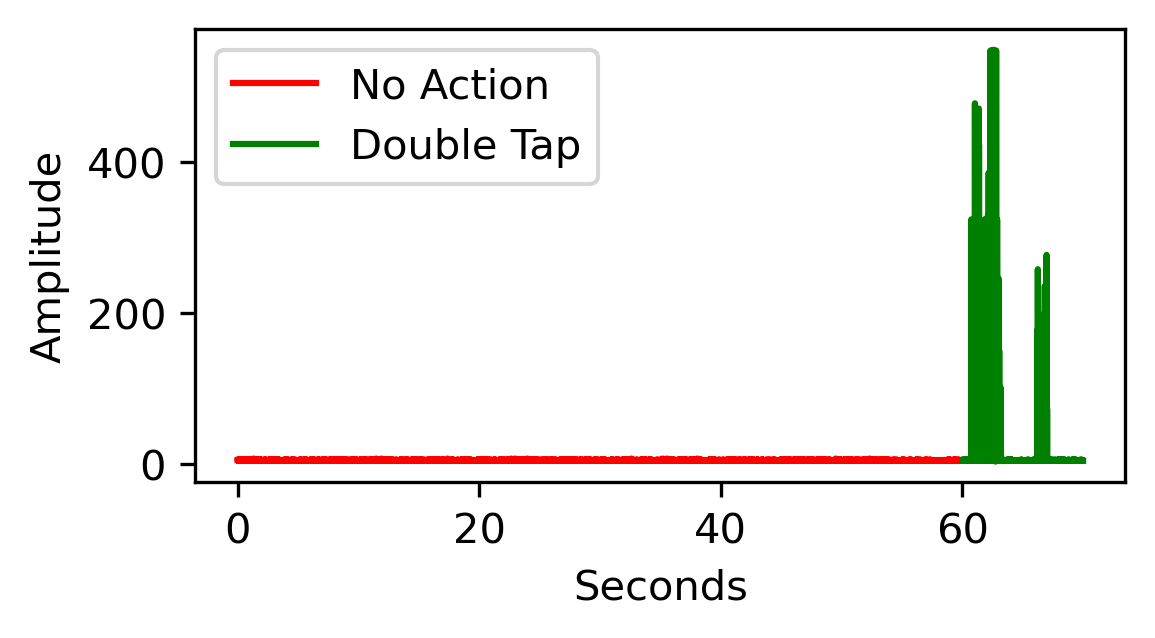

In [18]:

import pandas as pd


# Assuming df is your DataFrame

fig, ax = plt.subplots(1, 1, figsize=(4,2))
x = [i / 187 for i in range(0, len(df))]
y = df.iloc[:, 0]

ax.set_ylabel("Amplitude")
ax.set_xlabel("Seconds")
#ax.set_xlim(0, 60)

# Define the time intervals for different colors
red_interval = (0, 60)  # Red for the first 5 seconds
green_interval = (60, 70)  # Green for the next 5 seconds

# Split the data into segments based on time intervals
red_x = [x_val for x_val in x if red_interval[0] <= x_val <= red_interval[1]]
red_y = [y[i] for i in range(len(x)) if red_interval[0] <= x[i] <= red_interval[1]]

green_x = [x_val for x_val in x if green_interval[0] <= x_val <= green_interval[1]]
green_y = [y[i] for i in range(len(x)) if green_interval[0] <= x[i] <= green_interval[1]]

# Plot the data with different line colors
ax.plot(red_x, red_y, color='red', label='No Action')
ax.plot(green_x, green_y, color='green', label='Double Tap')

ax.legend()
plt.savefig("serpentine_action.pdf", bbox_inches='tight')
plt.show()


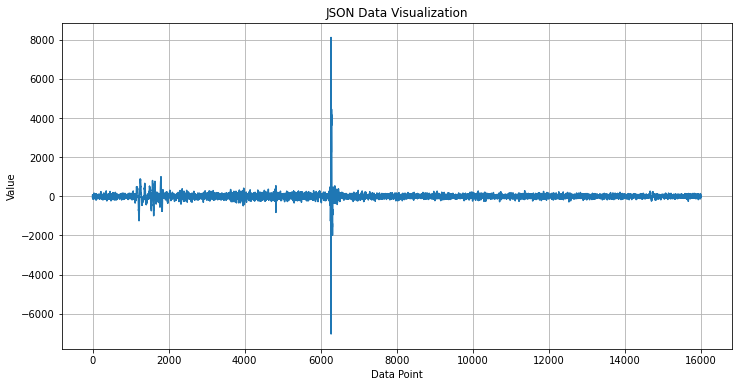

In [71]:
import json
import matplotlib.pyplot as plt

# Load the JSON file
json_file = "rishi-project-1-export/training/one tap.4d2rhfht.ingestion-78c74cc48c-z4k2q.json"  # Replace with the path to your JSON file

with open(json_file, 'r') as file:
    data = json.load(file)

# Extract and visualize the "values"
values = data["payload"]["values"]

plt.figure(figsize=(12, 6))
plt.plot(values)
plt.xlabel("Data Point")
plt.ylabel("Value")
plt.title("JSON Data Visualization")
plt.grid(True)
plt.show()

## Analysis

In [14]:
#fig, ax = plt.subplots(1, 1, figsize=(10, 5))
x = [i / 187 for i in range(0, len(df))]
y = df.iloc[:, 0]
#ax.plot(x,y)

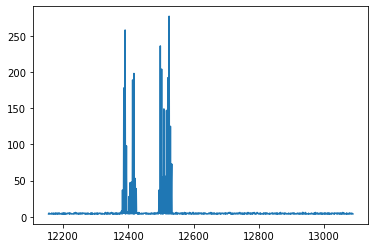

In [15]:
plt.plot(y[65*187:70*187])

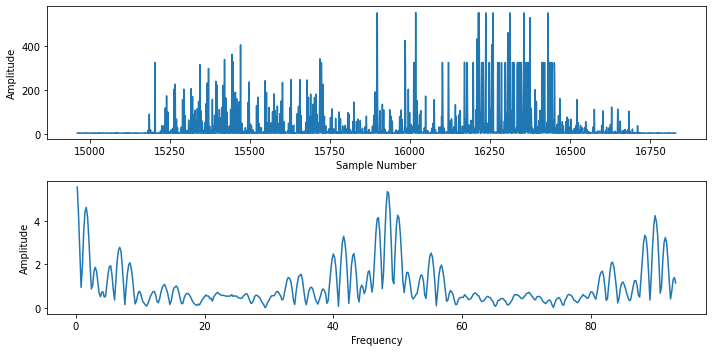

In [22]:
fig, ax = plt.subplots(2, 1, figsize=(10, 5))
F, A = compute_fft(y[65*187:70*187], 187, n = None, scale_amplitudes = True)
ax[0].plot(y[80*187:90*187])
ax[0].set_xlabel("Sample Number")
ax[0].set_ylabel("Amplitude")
ax[1].plot(F[1:],A[1:])
ax[1].set_xlabel("Frequency")
ax[1].set_ylabel("Amplitude")
fig.tight_layout()